<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Описание данных:

Rougher feed — исходное сырье

Rougher additions (или reagent additions) — флотационные реагенты:
       Xanthate, Sulphate, Depressant
       
Xanthate — ксантогенат (промотер, или активатор флотации);

Sulphate — сульфат (на данном производстве сульфид натрия);

Depressant — депрессант (силикат натрия).

Rougher process (англ. «грубый процесс») — флотация
Rougher tails — отвальные хвосты
Float banks — флотационная установка
Cleaner process — очистка
Rougher Au — черновой концентрат золота
Final Au — финальный концентрат золота

# Параметры этапов

air amount — объём воздуха

fluid levels — уровень жидкости

feed size — размер гранул сырья

feed rate — скорость подачи

Данные находятся в трёх файлах:

gold_recovery_train_new.csv — обучающая выборка;

gold_recovery_test_new.csv — тестовая выборка;

gold_recovery_full_new.csv — исходные данные.

## Подготовка данных

Используем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from numpy.random import RandomState
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.dummy import DummyRegressor

Открываем файлы с данными:

In [2]:
train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Изучаем и делаем анализ данных:

In [3]:
train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [7]:
full_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
full_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


# Вывод:

В данных есть пропуски;

Изменим тип данных колонки date в датасетах с object на datetime.

In [9]:
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y-%m-%d %H:%M:%S')
train_data.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

In [10]:
test_data['date'] = pd.to_datetime(test_data['date'], format='%Y-%m-%d %H:%M:%S')
test_data.dtypes

date                                          datetime64[ns]
primary_cleaner.input.sulfate                        float64
primary_cleaner.input.depressant                     float64
primary_cleaner.input.feed_size                      float64
primary_cleaner.input.xanthate                       float64
primary_cleaner.state.floatbank8_a_air               float64
primary_cleaner.state.floatbank8_a_level             float64
primary_cleaner.state.floatbank8_b_air               float64
primary_cleaner.state.floatbank8_b_level             float64
primary_cleaner.state.floatbank8_c_air               float64
primary_cleaner.state.floatbank8_c_level             float64
primary_cleaner.state.floatbank8_d_air               float64
primary_cleaner.state.floatbank8_d_level             float64
rougher.input.feed_ag                                float64
rougher.input.feed_pb                                float64
rougher.input.feed_rate                              float64
rougher.input.feed_size 

In [11]:
full_data['date'] = pd.to_datetime(full_data['date'], format='%Y-%m-%d %H:%M:%S')
full_data.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

Проверка дубликатов:

In [12]:
dubl = 0
for q in [train_data, test_data, full_data]:
    dubl += 1
    print(f'\nКоличество явных дубликатов в {dubl}-ом датасете - ',q.duplicated().sum())


Количество явных дубликатов в 1-ом датасете -  0

Количество явных дубликатов в 2-ом датасете -  0

Количество явных дубликатов в 3-ом датасете -  0


Работа с пропусками:

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.С помощью функции ffill заполним отсутствующие значения в тренировочной и тестовой выборках. Функция заполняет пропуски предпоследним значением признака (значения даты расположены по возрастанию).

In [13]:
train_data = train_data.ffill(axis=0)
test_data = test_data.ffill(axis=0)
full_data = full_data.ffill(axis=0)
print(f'\nРазмер тренировочной выборки - {train_data.shape} и количество строк без пропусков - {len(train_data.notna())}')
print(f'\nРазмер тестовой выборки - {test_data.shape} и количество строк без пропусков - {len(test_data.notna())}')
print(f'\nРазмер исходной выборки - {full_data.shape} и количество строк без пропусков - {len(full_data.notna())}')


Размер тренировочной выборки - (14149, 87) и количество строк без пропусков - 14149

Размер тестовой выборки - (5290, 53) и количество строк без пропусков - 5290

Размер исходной выборки - (19439, 87) и количество строк без пропусков - 19439


Вывод: пропуски отсутствуют.

Проверяем, что эффективность обогащения рассчитана правильно. Вычисляем её на обучающей выборке для признака rougher.output.recovery. Найдим MAE между нашими расчётами и значением признака. 

In [14]:
c = train_data['rougher.output.concentrate_au']
f = train_data['rougher.input.feed_au']
t = train_data['rougher.output.tail_au']
recovery = ((c*(f-t))/(f*(c-t))) * 100
print('MAE -', mean_absolute_error(train_data['rougher.output.recovery'], recovery))

MAE - 9.73512347450521e-15


Вывод: полученное значение мало, а значит расчеты верны.

Проанализируем признаки, недоступные в тестовой выборке.

In [15]:
missed = set(train_data.columns) - set(test_data.columns)
missed

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [16]:
print('\nКоличество отсутствующих признаков -', len(missed))


Количество отсутствующих признаков - 34


Вывод:

финальные характеристики.параметры продукта - нет 9 параметров;

первичная очистка.параметры продукта - нет 8 параметров;

флотация.расчётные характеристики - нет 4 параметров;

флотация.параметры продукта - нет 9 параметров;

вторичная очистка.параметры продукта - нет 4 параметров.

В основном в тестовой выборке отсутствуют значения типа "параметры продукта" - нет 30 параметров,
и нет 4 значения типа "расчетные характеристики".

Проводим предобработку данных:

Параметр recovery нужен для расчета метрики качества, дабавим его используя метод merge, в качестве индексов используем колонку date.

In [17]:
test_data = test_data.merge(full_data.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

Удаляем колонку date, как не информативную для дальнейшего обучения модели:

In [18]:
train_data = train_data.drop('date', axis=1)
test_data = test_data.drop('date', axis=1)
test_data.shape

(5290, 54)

In [19]:
train_data.shape

(14149, 86)

# Вывод:

Был изменен тип данных для колонки date с object на datetime.

Пропуски в датасетах (тренировочная выборки и тестовая) были заполнены значениями предшествующими
по времени.
 
МАЕ равно предельно малому значению - проверена правильность расчета эффективности обогащения.

В сравнение с тренировчной выборкой в тестовой отсутствуют 34 значения, 
может они замеряются и/или рассчитываются значительно позже.

В тестовую выборку были добавлены целевые признаки (rougher.output.recovery, final.output.recovery), 
которые будут необходимы в дальнейшем для рассчета итоговой метрики качества.

Колонка date была удалена как не информативна для дальнейшего обучения модели.

## Анализ данных

Удаляем анамалии из данных (значения в районе 0):

In [20]:
train_data = train_data[(train_data['rougher.output.concentrate_au'] != 0) & (train_data['rougher.output.concentrate_ag'] != 0) & (train_data['rougher.output.concentrate_pb'] != 0) & (train_data['rougher.output.concentrate_sol'] != 0)]
train_data = train_data[(train_data['final.output.concentrate_au'] != 0) & (train_data['final.output.concentrate_ag'] != 0) & (train_data['final.output.concentrate_pb'] != 0) & (train_data['final.output.concentrate_sol'] != 0)]
train_data = train_data[(train_data['primary_cleaner.output.concentrate_au'] != 0) & (train_data['primary_cleaner.output.concentrate_ag'] != 0) & (train_data['primary_cleaner.output.concentrate_pb'] != 0) & (train_data['primary_cleaner.output.concentrate_sol'] != 0)]
train_data = train_data[(train_data['rougher.input.feed_au'] != 0) & (train_data['rougher.input.feed_ag'] != 0) & (train_data['rougher.input.feed_pb'] != 0) & (train_data['rougher.input.feed_sol'] != 0)]

full_data = full_data[(full_data['rougher.output.concentrate_au'] != 0) & (full_data['rougher.output.concentrate_ag'] != 0) & (full_data['rougher.output.concentrate_pb'] != 0) & (full_data['rougher.output.concentrate_sol'] != 0)]
full_data = full_data[(full_data['final.output.concentrate_au'] != 0) & (full_data['final.output.concentrate_ag'] != 0) & (full_data['final.output.concentrate_pb'] != 0) & (full_data['final.output.concentrate_sol'] != 0)]
full_data = full_data[(full_data['primary_cleaner.output.concentrate_au'] != 0) & (full_data['primary_cleaner.output.concentrate_ag'] != 0) & (full_data['primary_cleaner.output.concentrate_pb'] != 0) & (full_data['primary_cleaner.output.concentrate_sol'] != 0)]
full_data = full_data[(full_data['rougher.input.feed_au'] != 0) & (full_data['rougher.input.feed_ag'] != 0) & (full_data['rougher.input.feed_pb'] != 0) & (full_data['rougher.input.feed_sol'] != 0)]


Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

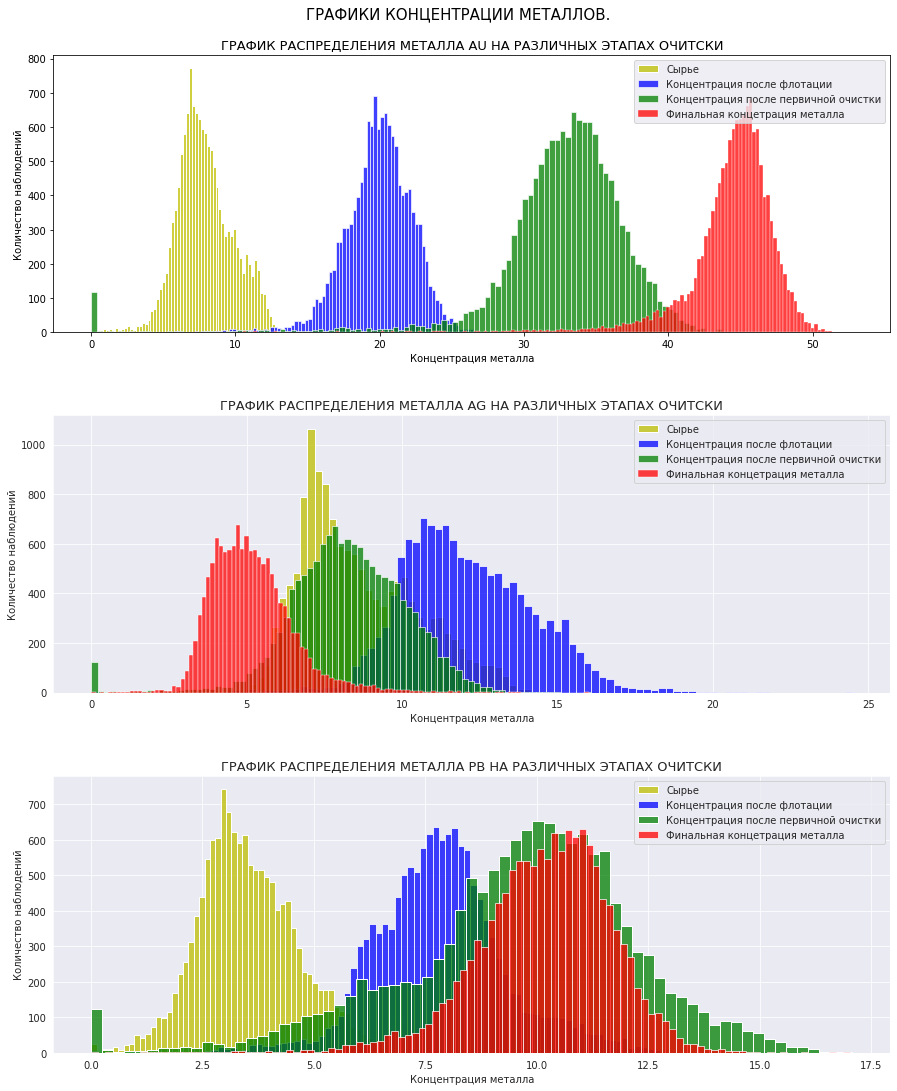

In [21]:
position = 0
plt.figure(figsize=[15, 17])
plt.subplots_adjust(top=0.94, wspace=0.2, hspace=0.3)
plt.suptitle('ГРАФИКИ КОНЦЕНТРАЦИИ МЕТАЛЛОВ.', fontsize=15)
for metal in ['au', 'ag', 'pb']:
    position += 1
    plt.subplot(3, 1, position)
    plt.title(f'ГРАФИК РАСПРЕДЕЛЕНИЯ МЕТАЛЛА {str(metal).upper()} НА РАЗЛИЧНЫХ ЭТАПАХ ОЧИТСКИ', fontsize=13)
    sns.set_style('darkgrid')
    sns.histplot(train_data[f'rougher.input.feed_{metal}'], color='y', label='Сырье', kde=False)
    sns.histplot(train_data[f'rougher.output.concentrate_{metal}'], color='b', label='Концентрация после флотации', kde=False)
    sns.histplot(train_data[f'primary_cleaner.output.concentrate_{metal}'], color='g', label='Концентрация после первичной очистки', kde=False)
    sns.histplot(train_data[f'final.output.concentrate_{metal}'], color='r', label='Финальная концетрация металла',kde=False)
    plt.xlabel('Концентрация металла')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show()

# Вывод:

Для золота (AU): после каждого этапа очистки постепенно увеличивается.

Для серебра(AG): увеличивается на этапе флотации, а затем постепенно уменьшается.

Для свинца(PB): сначала увеличивается на этапе флотации и после первичной очитски, 
затем остатется примерно на одном уровне.

Сравниваем распределения размеров гранул сырья на обучающей и тестовой выборках. 

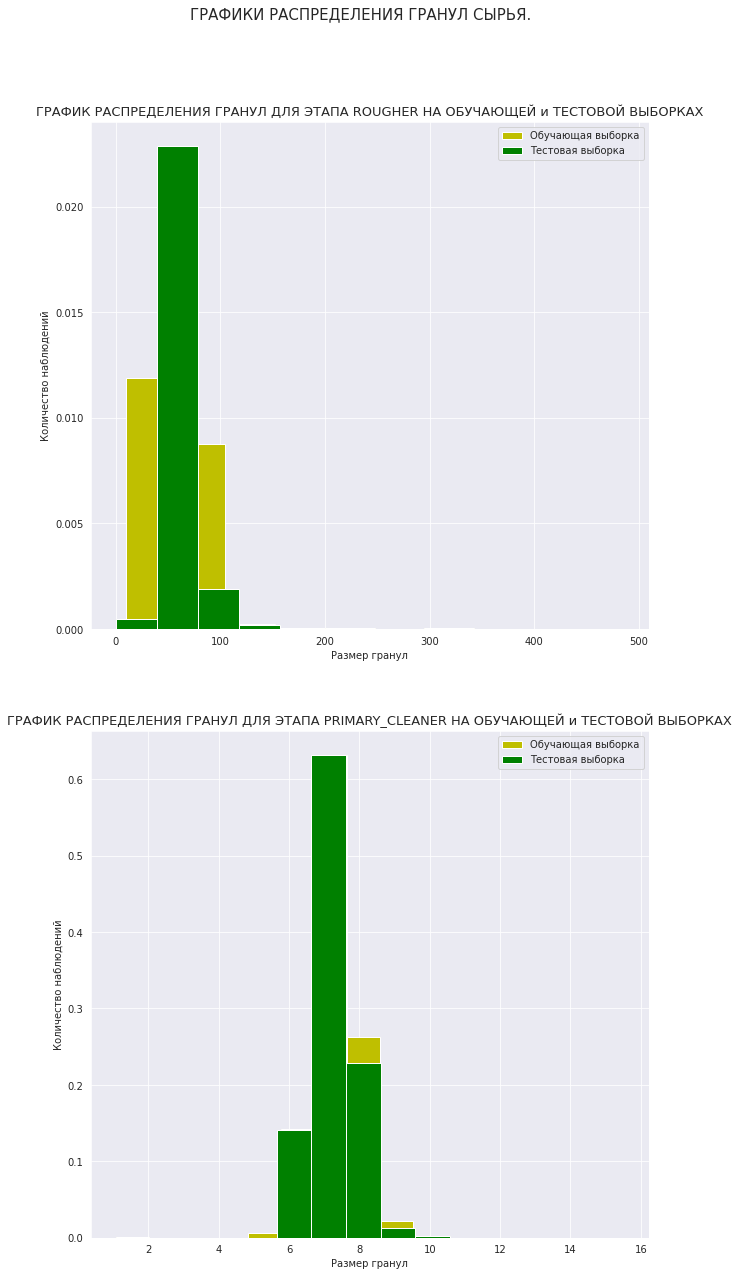

In [22]:
position = 0
plt.figure(figsize=[10, 20])
plt.subplots_adjust(top=0.90, wspace=0.2, hspace=0.2)
plt.suptitle('ГРАФИКИ РАСПРЕДЕЛЕНИЯ ГРАНУЛ СЫРЬЯ.', fontsize=15)
for stage in ['rougher', 'primary_cleaner']:
    position += 1
    plt.subplot(2, 1, position)
    plt.title(f'ГРАФИК РАСПРЕДЕЛЕНИЯ ГРАНУЛ ДЛЯ ЭТАПА {str(stage).upper()} НА ОБУЧАЮЩЕЙ и ТЕСТОВОЙ ВЫБОРКАХ', fontsize=13)
    sns.set_style('darkgrid')
    plt.hist(train_data[f'{stage}.input.feed_size'], color='y', label='Обучающая выборка', density=True)
    plt.hist(test_data[f'{stage}.input.feed_size'], color='g', label='Тестовая выборка', density=True)
    plt.xlabel('Размер гранул')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show();

# Вывод:

Для этапа флотации распределение гранул находится примерно в одинаковом диапазоне, 
для тестовой выборки преобладают гранулы с размером 50, 
а для обучающей меньше 50.

Для этапа первичной очитски разспределение гранул для выборок находится в одном диапазоне, 
однако есть различия в количестве наблюдений. 
Так для обучающей выборки количество наблюдений размера гранул чуть больше, чем для тестовой.

Следовательно, значимых различий между распределениями для выборок нет.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

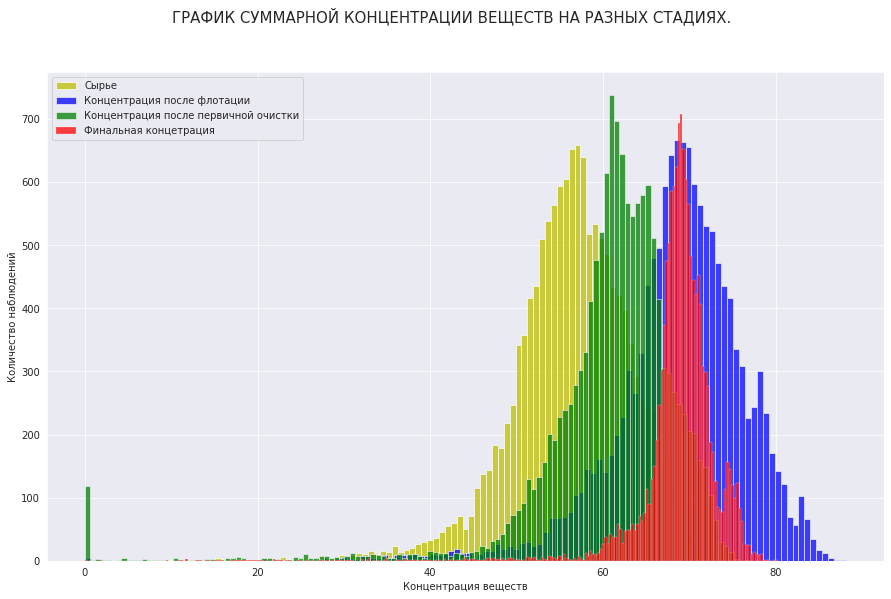

In [23]:
sum_concentrate_of_rougher_input = 0
sum_concentrate_of_rougher_output = 0
sum_concentrate_of_primary_cleaner_output = 0
sum_concentrate_of_final_output = 0
for metal in ['au', 'ag', 'pb', 'sol']:
    sum_concentrate_of_rougher_input += train_data[f'rougher.input.feed_{metal}']
    sum_concentrate_of_rougher_output += train_data[f'rougher.output.concentrate_{metal}'] 
    sum_concentrate_of_primary_cleaner_output += train_data[f'primary_cleaner.output.concentrate_{metal}'] 
    sum_concentrate_of_final_output += train_data[f'final.output.concentrate_{metal}']
plt.figure(figsize=[15, 9])
plt.suptitle('ГРАФИК СУММАРНОЙ КОНЦЕНТРАЦИИ ВЕЩЕСТВ НА РАЗНЫХ СТАДИЯХ.', fontsize=15)
sns.set_style('darkgrid')
sns.histplot(sum_concentrate_of_rougher_input, color='y', label='Сырье', kde=False)
sns.histplot(sum_concentrate_of_rougher_output, color='b', label='Концентрация после флотации', kde=False)
sns.histplot(sum_concentrate_of_primary_cleaner_output, color='g', label='Концентрация после первичной очистки', kde=False)
sns.histplot(sum_concentrate_of_final_output, color='r', label='Финальная концетрация',kde=False)
plt.xlabel('Концентрация веществ')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

# Вывод:

Распределения гранул сырья на обучающей и тестовой выборках различий нет;

Суммарная концентрация веществ увеличивается к финальному этапу, а диапазон распределения суммарной концентрации веществ уменьшается;

Доля золота увеличивается по мере прохождения этапов очистки.

In [24]:
train_data = train_data[(train_data['rougher.output.concentrate_au'] != 0) & (train_data['rougher.output.concentrate_ag'] != 0) & (train_data['rougher.output.concentrate_pb'] != 0) & (train_data['rougher.output.concentrate_sol'] != 0)]
train_data = train_data[(train_data['final.output.concentrate_au'] != 0) & (train_data['final.output.concentrate_ag'] != 0) & (train_data['final.output.concentrate_pb'] != 0) & (train_data['final.output.concentrate_sol'] != 0)]
train_data = train_data[(train_data['primary_cleaner.output.concentrate_au'] != 0) & (train_data['primary_cleaner.output.concentrate_ag'] != 0) & (train_data['primary_cleaner.output.concentrate_pb'] != 0) & (train_data['primary_cleaner.output.concentrate_sol'] != 0)]
train_data = train_data[(train_data['rougher.input.feed_au'] != 0) & (train_data['rougher.input.feed_ag'] != 0) & (train_data['rougher.input.feed_pb'] != 0) & (train_data['rougher.input.feed_sol'] != 0)]


## Модель

Напишем функцию для вычисления sMape

In [25]:
def get_smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

In [26]:
smape_scorer = make_scorer(get_smape, greater_is_better = False)

Напишем функцию для вычисления итоговой sMAPE.

In [27]:
def get_final_smape(rougher, final):
    final = 0.25*rougher+0.75*final
    return final

Удаление отсутствующих в тестовой выборке признаков (за исключением целевых признаков) из тренировочной выборки.

In [28]:
signs_for_delete_without_target_signs = missed - set(['rougher.output.recovery','final.output.recovery'])
train_data = train_data.drop(columns=signs_for_delete_without_target_signs, axis=1)

Обучим разные модели и оцените их качество кросс-валидацией.

In [29]:
features_for_train = train_data.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_for_rougher_on_train = train_data['rougher.output.recovery']
target_for_final_on_train = train_data['final.output.recovery']

In [30]:
dct_with_scores = {}

Модель LinearRegression

In [31]:
%%time
model_lr_rougher = LinearRegression()
smape_rougher = cross_val_score(model_lr_rougher,
                          features_for_train,
                          target_for_rougher_on_train,
                          scoring=smape_scorer,
                          cv=5)
final_smape_rougher = smape_rougher.mean()
model_lr_final = LinearRegression()
smape_final = cross_val_score(model_lr_final,
                        features_for_train,
                        target_for_final_on_train,
                        scoring=smape_scorer,
                        cv=5)
final_smape_final = smape_final.mean()
result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
dct_with_scores['LR'] = [result_smape]

CPU times: user 944 ms, sys: 2.19 s, total: 3.13 s
Wall time: 3.07 s


Модель DecisionTreeRegressor

In [32]:
%%time
best_result_for_dt = 100
best_param_for_dt = 0
for n in range(1, 10, 1):
    model_dt_rougher = DecisionTreeRegressor(max_depth=n, random_state=RandomState(12345))
    smape_rougher = cross_val_score(model_dt_rougher,
                              features_for_train,
                              target_for_rougher_on_train,
                              scoring=smape_scorer,
                              cv=5)
    final_smape_rougher = smape_rougher.mean()

    model_dt_final = DecisionTreeRegressor(max_depth=n, random_state=RandomState(12345))
    smape_final = cross_val_score(model_dt_final, 
                                  features_for_train,
                                  target_for_final_on_train,
                                  scoring=smape_scorer,
                                  cv=5)
    final_smape_final = smape_final.mean()
    result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
    if result_smape < best_result_for_dt:
        best_result_for_dt = result_smape
        best_param_for_dt = n
dct_with_scores['DT'] = [best_result_for_dt, best_param_for_dt]

CPU times: user 22.5 s, sys: 110 ms, total: 22.6 s
Wall time: 22.6 s


Модель RandomForestRegressor

In [33]:
%%time
best_model_for_rf = 100
best_param_for_rf = 0
for n in range(10, 100, 30):
    for d in range(2,10,2):
        model_rf_rougher = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=RandomState(12345))
        smape_rougher = cross_val_score(model_rf_rougher,
                                  features_for_train,
                                  target_for_rougher_on_train,
                                  scoring=smape_scorer,
                                  cv=5)
        final_smape_rougher = smape_rougher.mean()

        model_rf_final = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=RandomState(12345))
        smape_final = cross_val_score(model_rf_final,
                                features_for_train,
                                target_for_final_on_train,
                                scoring=smape_scorer,
                                cv=5)
        final_smape_final = smape_final.mean()
        result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
        if result_smape < best_model_for_rf:
            best_model_for_rf = result_smape
            best_param_for_rf = [n,d]
dct_with_scores['RF'] = [best_model_for_rf, best_param_for_rf]

CPU times: user 11min 51s, sys: 1.18 s, total: 11min 52s
Wall time: 11min 53s


In [34]:
for key in dct_with_scores.keys():
    print(f'\nМОДЕЛЬ {str(key).upper()} С РЕЗУЛЬТАТОМ - {dct_with_scores[key][0]}')


МОДЕЛЬ LR С РЕЗУЛЬТАТОМ - 10.023124524855415

МОДЕЛЬ DT С РЕЗУЛЬТАТОМ - 8.894948412843105

МОДЕЛЬ RF С РЕЗУЛЬТАТОМ - 8.410542222026999


Лучшая модель - RandomForestRegressor

In [35]:
print('\nЛУЧШИЕ ПАРАМЕТРЫ ДЛЯ МОДЕЛИ RF: N_ESTIMATORS - {}, MAX_DEPTH - {}'.format(dct_with_scores['RF'][1][0], dct_with_scores['RF'][1][1]))


ЛУЧШИЕ ПАРАМЕТРЫ ДЛЯ МОДЕЛИ RF: N_ESTIMATORS - 40, MAX_DEPTH - 4


In [36]:
features_for_test = test_data.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_for_rougher_on_test = test_data['rougher.output.recovery']
target_for_final_on_test = test_data['final.output.recovery']

In [37]:
model_for_test_rougher = RandomForestRegressor(n_estimators=40, max_depth=4, random_state=RandomState(12345))
model_for_test_rougher.fit(features_for_train, target_for_rougher_on_train)
predicted_rougher = model_for_test_rougher.predict(features_for_test)

model_for_test_final = RandomForestRegressor(n_estimators=40, max_depth=4, random_state=RandomState(12345))
model_for_test_final.fit(features_for_train, target_for_final_on_train)
predicted_final = model_for_test_final.predict(features_for_test)

smape_for_test_rougher = get_smape(target_for_rougher_on_test, predicted_rougher)
smape_for_test_final = get_smape(target_for_final_on_test, predicted_final)
final_smape_for_test = get_final_smape(smape_for_test_rougher, smape_for_test_final)

In [38]:
print(f'\nSMAPE ДЛЯ ТЕСТОВОЙ ВЫБОРКИ СОСТОВЛЯЕТ - {final_smape_for_test}')


SMAPE ДЛЯ ТЕСТОВОЙ ВЫБОРКИ СОСТОВЛЯЕТ - 9.408783788062488


Вычислим показатель sMape для константной модели и сравним с результатами лучшей модели.

In [39]:
dummy_regr_for_rougher = DummyRegressor(strategy="mean")
dummy_regr_for_final = DummyRegressor(strategy="mean")

dummy_regr_for_rougher.fit(features_for_train, target_for_rougher_on_train)
dummy_regr_for_final.fit(features_for_train, target_for_final_on_train)

dummy_predicted_rougher = dummy_regr_for_rougher.predict(features_for_test)
dummy_predicted_final = dummy_regr_for_final.predict(features_for_test)

smape_for_const_rougher = get_smape(target_for_rougher_on_test, dummy_predicted_rougher)
smape_for_const_final = get_smape(target_for_final_on_test, dummy_predicted_final)

final_smape_for_const = get_final_smape(smape_for_const_rougher, smape_for_const_final)

In [40]:
print(f'\nПОКАЗАТЕЛЬ SMAPE ДЛЯ КОНСТАНТНОЙ МОДЕЛИ - {final_smape_for_const}')


ПОКАЗАТЕЛЬ SMAPE ДЛЯ КОНСТАНТНОЙ МОДЕЛИ - 9.827613822597584


Показатель модели RandomForestRegressor намного меньше показателя константной, что означает хорошее качество полученной модели.

Вывод:

Лучшая модель - RandomForestRegressor

Модель проверена на адекватность, ее показатель SMAPE намного меньше показателя константной модели.

# Общий вывод:

Моделью с лучшими результатами прогноза является - RandomForestRegressor

Модель проверена на адекватность.

В процессе обработки данных были удалены аномальные значения и проверено распределение веществ для обучающей и тестовой выборки.

Установленно, что мере прохождения стадий технологического процесса доля золота увеличичвается, а серебра уменьшается. Общее суммарное количество веществ снижается по мере прохождения этапов обработки.